CHI SQUARE TESTS
To compare the actual vs expected results
The observed and expected frequencies should be >5
we use the chisquare function:

In [118]:
die_expected = [100,100,100,100,100,100]
die_actual =  [106,150,119,87,101,37]

The chisquare method gives two values:
    
    1. Chi square statistic
    2. p value
    

In [120]:


stats.chisquare(die_actual, die_expected)

Power_divergenceResult(statistic=70.36, pvalue=8.624026328466518e-14)

Let us see if ethnicity determines voting patterns

In [123]:
voters=pd.read_csv('C:\Python\Practice Exercises\dataset\Voting_pattern.csv')

In [124]:
voters.head()

,RACE,PARTY
0,WHITE,REPUBLICAN
1,WHITE,REPUBLICAN
2,WHITE,DEMOCRAT
3,HISPANIC,DEMOCRAT
4,ASIAN,DEMOCRAT


In [125]:
voter_tab = pd.crosstab(voters.RACE, voters.PARTY)
voter_tab

PARTY,DEMOCRAT,INDEPENDENT,REPUBLICAN
RACE,,,
ASIAN,19,8,15
BLACK,60,32,59
HISPANIC,105,45,86
OTHER,12,8,17
WHITE,207,100,227


In [126]:
stats.chi2_contingency(voter_tab)

(4.73783947307747, 0.7851934085104636, 8, array([[ 16.926,   8.106,  16.968],
        [ 60.853,  29.143,  61.004],
        [ 95.108,  45.548,  95.344],
        [ 14.911,   7.141,  14.948],
        [215.202, 103.062, 215.736]]))

In [127]:
chi_square , p_value,degrees_of_freedom,expected_frequencies = stats.chi2_contingency(voter_tab)

In [128]:
chi_square

4.73783947307747

In [129]:
p_value

0.7851934085104636

In [130]:
degrees_of_freedom

8

In [131]:
expected_frequencies

array([[ 16.926,   8.106,  16.968],
       [ 60.853,  29.143,  61.004],
       [ 95.108,  45.548,  95.344],
       [ 14.911,   7.141,  14.948],
       [215.202, 103.062, 215.736]])

Linear regression

Assumptions:
1. linearity and additivity of the relationship between dependent and independent variables:
2. statistical independence of the errors
3. constant variance of the errors
4. normality of the error distribution.

In [122]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import the housing dataset

hsg=pd.read_csv('C:\Python\Practice Exercises\dataset\Housing_data.csv')

In [4]:
hsg.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0


In [6]:
hsg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
Price         1047 non-null int64
LivingArea    1047 non-null int64
Bathrooms     1047 non-null float64
Bedrooms      1047 non-null int64
LotSize       1047 non-null float64
Age           1047 non-null int64
Fireplace     1047 non-null int64
dtypes: float64(2), int64(5)
memory usage: 57.3 KB


In [61]:
lv= hsg['LivingArea']

In [36]:
price=hsg['Price']

Text(0,0.5,'Price')

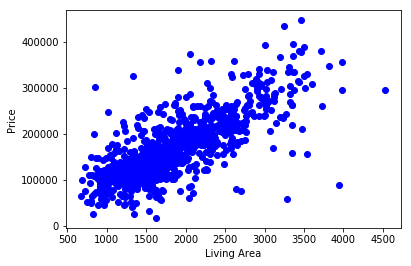

In [52]:
plt.scatter(lv,price,color='Blue')
plt.xlabel('Living Area')
plt.ylabel('Price')

In [116]:
# Getting the correlation matrix between the variables

corr_coef = hsg.corr()
corr_coef ## corelation Matrix

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
Price,1.000000,0.776396,0.670189,0.471074,0.155284,-0.363354,0.460237
LivingArea,0.776396,1.000000,0.722649,0.664347,0.200180,-0.263168,0.481436
Bathrooms,0.670189,0.722649,1.000000,0.491798,0.100993,-0.443830,0.444700
Bedrooms,0.471074,0.664347,0.491798,1.000000,0.140682,-0.060598,0.295873
LotSize,0.155284,0.200180,0.100993,0.140682,1.000000,0.015135,0.052765
Age,-0.363354,-0.263168,-0.443830,-0.060598,0.015135,1.000000,-0.248794
Fireplace,0.460237,0.481436,0.444700,0.295873,0.052765,-0.248794,1.000000


In [55]:
hsg.Price.corr(hsg.LivingArea)

0.7763964501037222

Creating a scatter plot using the seaborn package

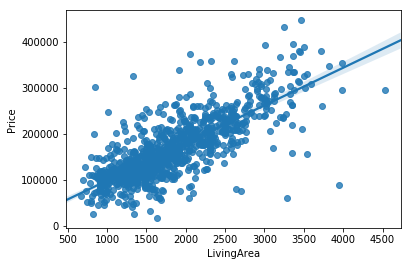

In [57]:
# import seaborn package as sns

import seaborn as sns

sns.regplot(x="LivingArea", y="Price", data=hsg)

In order to make a linear regression model , import the module from Scikit learn package

In [ ]:
from sklearn import linear_model

In [38]:
# Initialize model
regression_model = linear_model.LinearRegression()



regression_model.fit() -> fits a linear model
In other words, the first step is for the model to "Learn " the data and derive the coefficients.
it is called as fitting the model

In [64]:
# Train the model using the housing data
regression_model.fit(X = hsg[['LivingArea']],
                     y = hsg["Price"])



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
# Check trained model y-intercept
print(regression_model.intercept_)



15875.636989985855


In [66]:
# Check trained model coefficients
print(regression_model.coef_)

[81.88251056]


# Prediction for a single Independent variable value using coefficients

In [111]:
# ypred = beta0 + beta1 x1
#Price = b0 + b1*Living Area
b0=15880
b1 = 81.8825

price_pred = b0 +(b1* 1629)
price_pred

149266.5925

## R square

R square is a measure of how well your model fits the data

Rsquare=1-(SSResiduals/SS Total)

We can find the R square using the score method in regression model




## Linear Regression.score()
The output of the score function for linear regression is "R-squared".

The value that ranges from 0 to 1 which describes the proportion of variance in the response variable that is explained by the model. 

In this case, Living Area explains roughly 60% of the variance in House prices

In [67]:
regression_model.score(X = hsg[['LivingArea']],
                     y = hsg["Price"])

0.6027914477336614

## Prediction


For Predicting the output, we use the predict method over the regression model

regression_model.predict :-

It predicts Y using the linear model with estimated coefficients

In [75]:
train_prediction = regression_model.predict(X = hsg[['LivingArea']])

train_prediction

array([149262.24668738, 125925.73117862,  83183.06066786, ...,
       291082.75497214, 281993.79630031, 299762.30109119])

Now that we have created the regression output, let us plot the best fit line

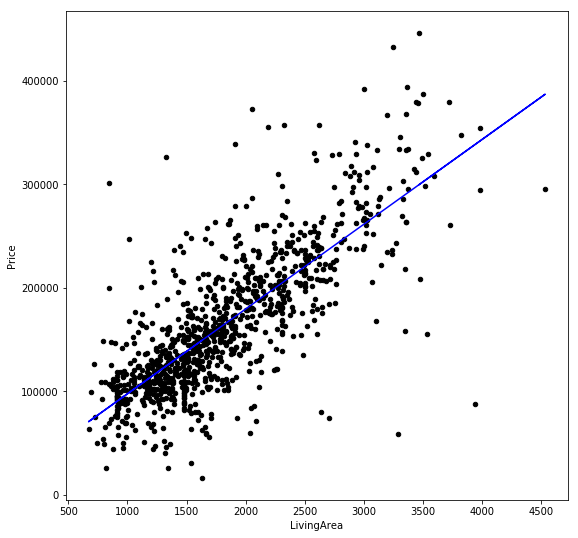

In [99]:
# Having a scatter plot of Living area vs Price

hsg.plot(kind="scatter",
           x="LivingArea",
           y="Price",
           figsize=(9,9),
           color="black")

# Plot regression line
plt.plot(hsg["LivingArea"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue")

## Residual calculation
We can extract the model's residuals by making a prediction with the model on the 
data and then subtracting the actual value from each prediction:

In [76]:
# Actual - prediction = residuals
residuals = hsg['Price'] - train_prediction

residuals.describe()

count    1.047000e+03
mean    -2.724141e-11
std      4.263705e+04
min     -2.507283e+05
25%     -2.083217e+04
50%     -1.748463e+03
75%      1.854249e+04
max      2.157009e+05
Name: Price, dtype: float64

## How to get R squared

R-squared =1 - (SSResiduals/SSTotal)

were SSResiduals is the sum of the squares of the model residuals 
SSTotal = the sum of the squares of the difference between each data point and the mean of the data.



In [110]:

SSResiduals = (residuals**2).sum()

SSResiduals



1378964.056690819

In [88]:
SSR=((train_prediction-hsg['Price'].mean())**2).sum()

In [90]:
TSS=SSR+SSResiduals
TSS

4787263161368.609

In [94]:
SSR/TSS

0.6027914477336614

## Check the normality of residuals

In a well-behaved linear regression model, we'd like the residuals to be roughly normally distributed. 

we'd like a roughly even spread of error above and below the regression line. 

We can investigate the normality of residuals with a Q-Q (quantile-quantile) plot.


We can Make a qqplot by passing the residuals to the stats.probplot() function in the scipy.stats library:

When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot

((array([-3.21080761, -2.94660583, -2.79923536, ...,  2.79923536,
          2.94660583,  3.21080761]),
  array([-250728.25862689, -225856.68416981, -163191.4755784 , ...,
          188837.15628366,  201878.1540114 ,  215700.87656822])),
 (41381.230651304744, -1.685505304393108e-11, 0.9684184189670919))

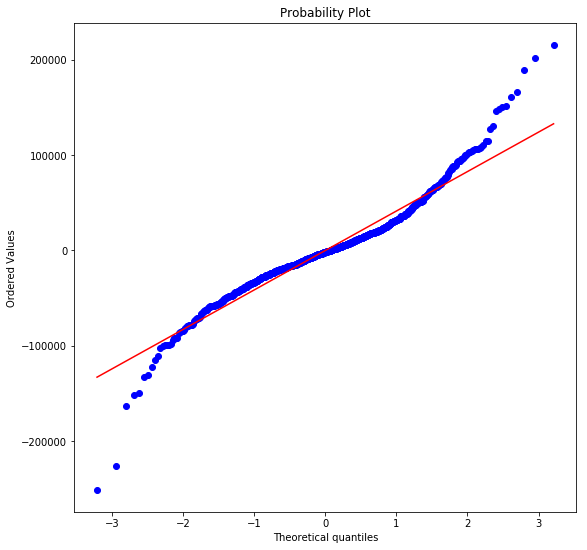

In [102]:
from scipy import stats


plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt)

In [109]:

from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction,hsg['Price'])**0.5

RMSE

42616.67920387508